## Funções para plotar gráficos by Matheus


In [1]:
import os
import numpy as np
# import splitfolders
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2 # , ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model


from utils.plots import plot_sample_images, plot_training_history, plot_confusion_matrix, plot_image

print("Versão do Tensorflow:")
print(tf.__version__)

Versão do Tensorflow:
2.20.0


# Classificação de Elementos Eletrônicos com TensorFlow e Keras - Tarefa 24

## Carregar dados

Found 5423 images belonging to 17 classes.
Found 671 images belonging to 17 classes.
Found 671 images belonging to 17 classes.
Found 688 images belonging to 17 classes.
Found 688 images belonging to 17 classes.


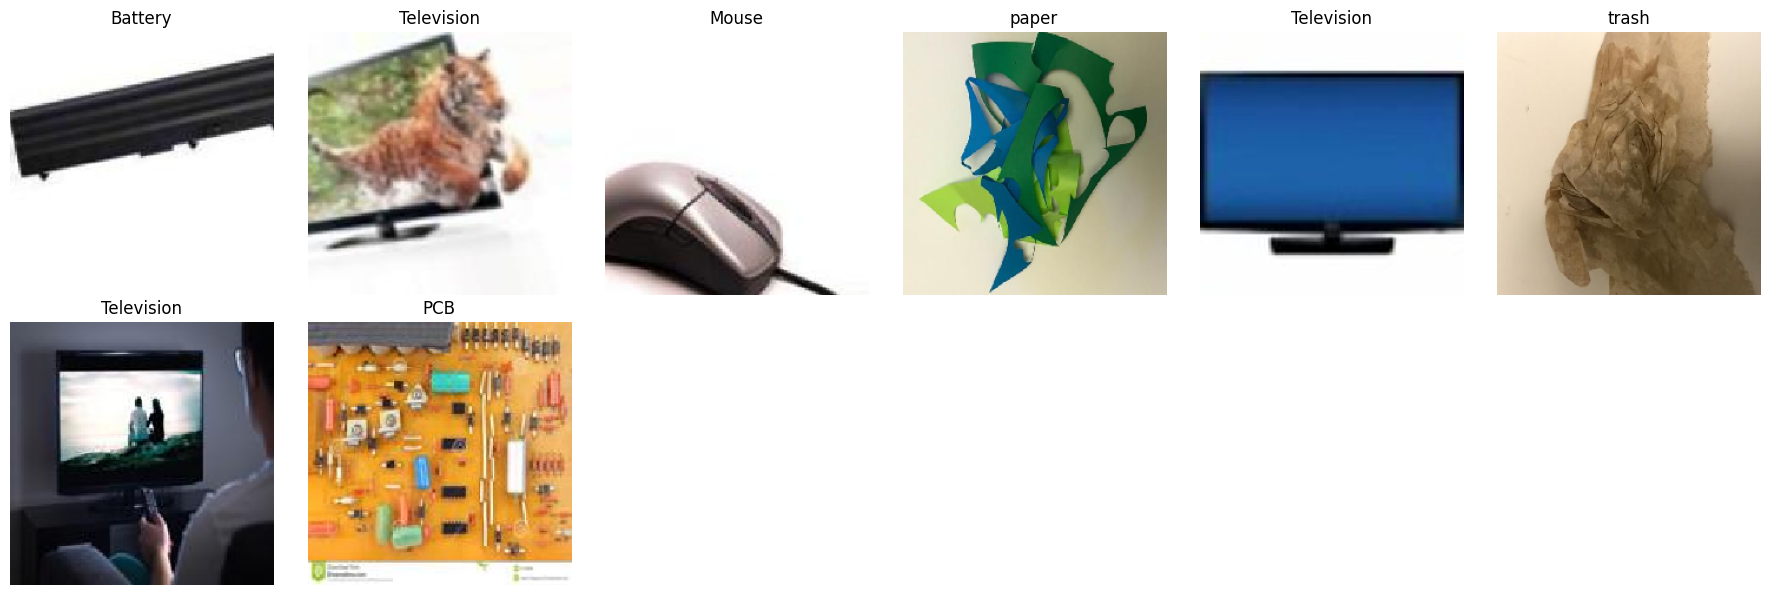

In [2]:
"""
# Dividir os dados em treino, validação e teste
splitfolders.ratio(
    input='../data/balanced_waste_images',
    output='../data/split_data',
    seed=42,
    ratio=(.8, .1, .1),
    group_prefix=None,
    move=False
)"""

# Configurações
IMG_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
SEED = 42
EPOCHS = 20
IMAGE_BASE_PATH = "../data/split_data"

# Data generators with preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '../data/split_data/train/',
    target_size=IMG_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    '../data/split_data/val/',
    target_size=IMG_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    '../data/split_data/test/',
    target_size=IMG_SHAPE[:2],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())

plot_sample_images(train_generator, class_names)

## Criar o modelo

In [3]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)
base_model.trainable = False

inputs = keras.Input(shape=IMG_SHAPE)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(len(class_names), activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,590,289 (9.88 MB)

 Trainable params: 332,305 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Treinar o modelo

In [ ]:
WEIGHTS_PATH = '../models/mobilenet_weights.weights.h5'

# Verificar se os pesos existem
if os.path.exists(WEIGHTS_PATH):
    print("Carregando pesos existentes...")
    model.load_weights(WEIGHTS_PATH)
    print("Pesos carregados com sucesso!")
else:
    print("Treinando novo modelo...")
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=EPOCHS,
        verbose=2
    )
    # Salvar os pesos após o treinamento
    os.makedirs('../models', exist_ok=True)
    model.save_weights(WEIGHTS_PATH)
    print(f"Pesos salvos em: {WEIGHTS_PATH}")

    # Salvar o modelo completo
    MODEL_PATH = '../models/mobilenet_model.keras'
    model.save(MODEL_PATH)
    print(f"Modelo completo salvo em: {MODEL_PATH}")

Treinando novo modelo...
Epoch 1/20
170/170 - 117s - 689ms/step - accuracy: 0.7348 - loss: 0.8393 - val_accuracy: 0.8629 - val_loss: 0.4633
Epoch 2/20
170/170 - 117s - 689ms/step - accuracy: 0.7348 - loss: 0.8393 - val_accuracy: 0.8629 - val_loss: 0.4633
Epoch 2/20
170/170 - 88s - 517ms/step - accuracy: 0.8812 - loss: 0.3610 - val_accuracy: 0.8733 - val_loss: 0.3665
Epoch 3/20
170/170 - 88s - 517ms/step - accuracy: 0.8812 - loss: 0.3610 - val_accuracy: 0.8733 - val_loss: 0.3665
Epoch 3/20
170/170 - 99s - 581ms/step - accuracy: 0.9244 - loss: 0.2258 - val_accuracy: 0.8674 - val_loss: 0.3910
Epoch 4/20
170/170 - 99s - 581ms/step - accuracy: 0.9244 - loss: 0.2258 - val_accuracy: 0.8674 - val_loss: 0.3910
Epoch 4/20
170/170 - 130s - 766ms/step - accuracy: 0.9436 - loss: 0.1640 - val_accuracy: 0.8897 - val_loss: 0.3263
Epoch 5/20
170/170 - 130s - 766ms/step - accuracy: 0.9436 - loss: 0.1640 - val_accuracy: 0.8897 - val_loss: 0.3263
Epoch 5/20
170/170 - 88s - 520ms/step - accuracy: 0.9618 - 

Pesos salvos em: ../models/mobilenet_weights.weights.h5
Modelo completo salvo em: ../models/mobilenet_model.h5
Modelo completo salvo em: ../models/mobilenet_model.h5


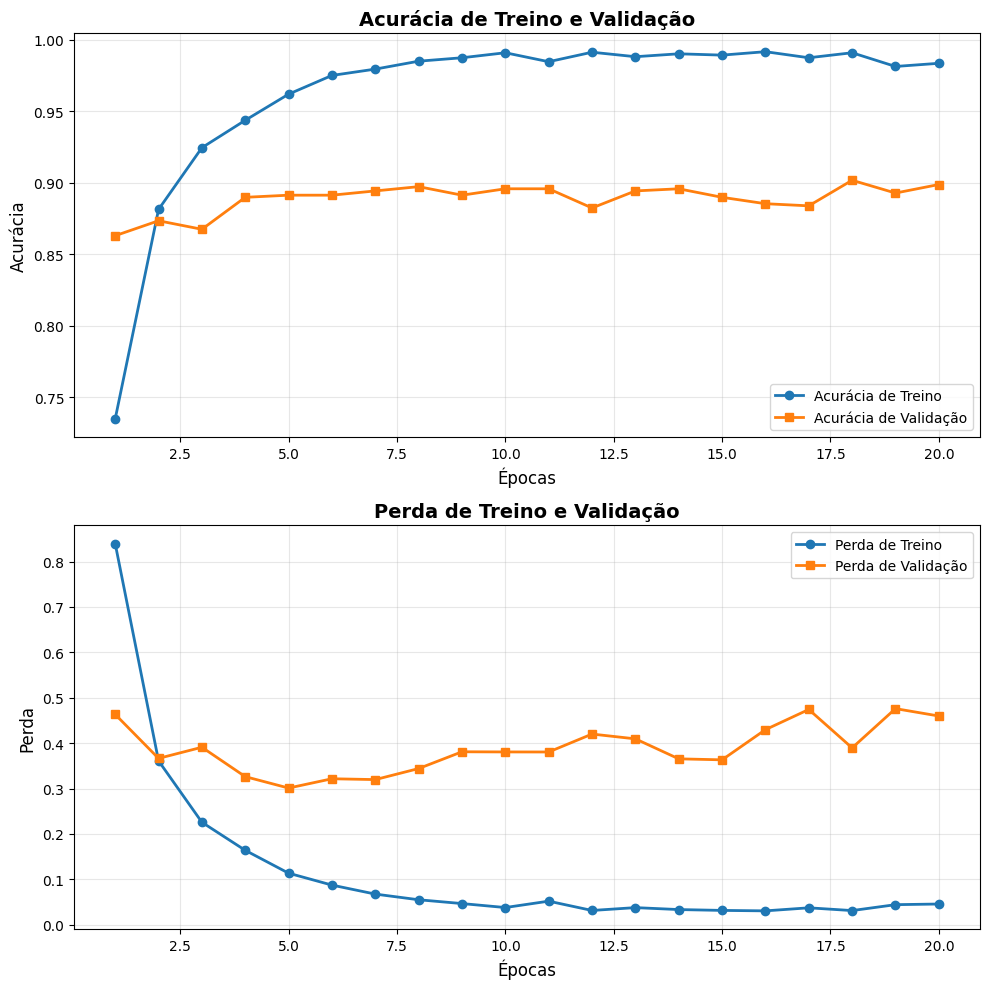

In [5]:
plot_training_history(history)

## Avaliar o modelo

In [6]:
# Previsões
y_pred = model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=class_names))

22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 512ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 512ms/step
                 precision    recall  f1-score   support

        Battery       1.00      0.93      0.96        41
       Keyboard       0.95      1.00      0.98        41
      Microwave       0.93      1.00      0.96        41
         Mobile       0.97      0.97      0.97        40
          Mouse       1.00      1.00      1.00        41
            PCB       0.93      0.90      0.91        41
         Player       0.88      0.93      0.90        41
        Printer       0.93      0.95      0.94        40
     Television       0.95      0.90      0.93        41
Washing Machine       1.00      0.95      0.97        40
      cardboard       0.92      0.85      0.88        40
          glass       0.61      0.95      0.75        40
          metal       0.88      0.57      0.70        40
        organic       0.95      0.90      0.92        40
          paper       0.77      0.85      0.81        40
   

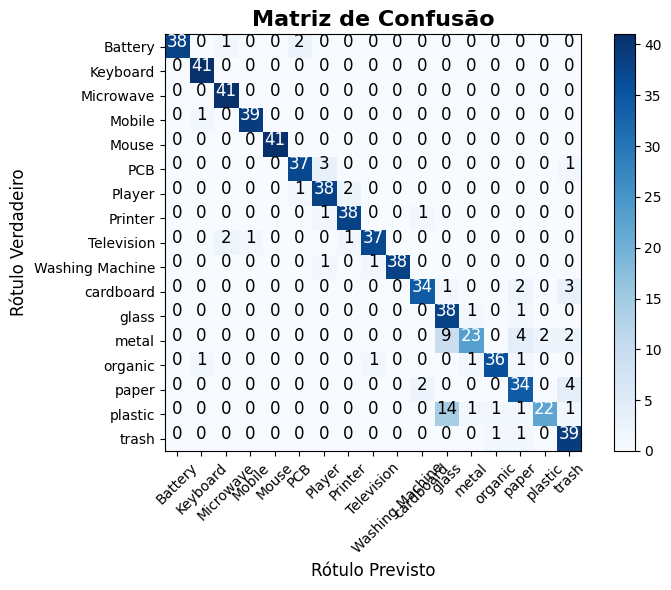

In [12]:
# Gerar matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

plot_confusion_matrix(cm, class_names)

## TensorFlow Lite - Float32

### Converter o modelo para TensorFlow Lite Float32

In [8]:
# ----------------------------
# CONVERTER PARA O TFLITE (FLOAT32)
# ----------------------------

# Define o nome do arquivo TFLite de saída
tflite_float_path = "../models/waste_classification_float32.tflite"

# Cria um conversor TFLite a partir de um modelo Keras
converter_float = tf.lite.TFLiteConverter.from_keras_model(model)

# Não quantiza (continua float32), mas faz otimizações internas no grafo
converter_float.optimizations = [tf.lite.Optimize.DEFAULT]

# Converte o modelo para TFLite
tflite_model_float = converter_float.convert()

# Salva o arquivo .tflite no disco
os.makedirs('../models', exist_ok=True)
with open(tflite_float_path, "wb") as f:
    f.write(tflite_model_float)

print("Modelo TFLite float32 salvo em:", tflite_float_path)

INFO:tensorflow:Assets written to: C:\Users\mathe\AppData\Local\Temp\tmpmi1hem3t\assets


INFO:tensorflow:Assets written to: C:\Users\mathe\AppData\Local\Temp\tmpmi1hem3t\assets


Saved artifact at 'C:\Users\mathe\AppData\Local\Temp\tmpmi1hem3t'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  2581261445136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260752016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260749520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260753552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260752208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260974800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260972880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581256172368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260962320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260974992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

### Inferência com o modelo TensorFlow Lite Float32

INPUT (float32): [{'name': 'serving_default_keras_tensor_154:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
OUTPUT (float32): [{'name': 'StatefulPartitionedCall_1:0', 'index': 175, 'shape': array([ 1, 17], dtype=int32), 'shape_signature': array([-1, 17], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


c:\Users\mathe\Documents\Meus Codes\tarefa24_ia_embarcatech\.venv\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


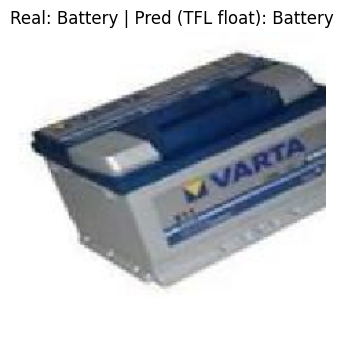

Probabilidades (float32): [9.9987423e-01 9.6395614e-10 6.7134476e-10 7.9886570e-10 6.3072741e-11
 2.8246834e-09 9.1880233e-05 3.3789242e-05 2.1152125e-11 1.5390978e-11
 5.7675042e-11 1.6879401e-10 4.0743336e-11 4.1750963e-09 3.3849564e-12
 4.2374650e-09 8.2582952e-10]


In [9]:
# ----------------------------
# INFERÊNCIA COM O TFLite FLOAT32
# ----------------------------

# Carregar modelo TFLite float32
interpreter_float = tf.lite.Interpreter(model_path=tflite_float_path)
interpreter_float.allocate_tensors()

input_details_f = interpreter_float.get_input_details()
output_details_f = interpreter_float.get_output_details()

print("INPUT (float32):", input_details_f)
print("OUTPUT (float32):", output_details_f)

# Resetar o gerador de teste
test_generator.reset()

# Pegar um batch de teste
test_images, test_labels = next(test_generator)

# Escolher uma imagem do batch
idx = 0
img = test_images[idx]
true_label_idx = np.argmax(test_labels[idx])
true_label = class_names[true_label_idx]

# Preparar entrada
input_data = np.expand_dims(img, axis=0).astype(np.float32)

interpreter_float.set_tensor(input_details_f[0]["index"], input_data)
interpreter_float.invoke()
output_data = interpreter_float.get_tensor(output_details_f[0]["index"])

pred_idx = int(np.argmax(output_data[0]))
pred_class = class_names[pred_idx]

plot_image(img, f"Real: {true_label} | Pred (TFL float): {pred_class}")

print("Probabilidades (float32):", output_data[0])

## TensorFlow Lite - Int8

### Converter o modelo para TensorFlow Lite

In [10]:
# ----------------------------
# CONVERTER PARA O TFLITE INT8 (TinyML)
# ----------------------------

# Define o nome do arquivo de saída
tflite_int8_path = "../models/waste_classification_int8.tflite"

# Função fornece amostras reais do dataset para calibração
def representative_data_gen():
    # Resetar o gerador
    train_generator.reset()
    # Usar 100 imagens para calibrar
    for _ in range(10):  # 10 batches de 32 imagens = 320 amostras
        images, _ = next(train_generator)
        for img in images:
            yield [np.expand_dims(img, axis=0).astype(np.float32)]

# Criação do conversor TFLite
converter_int8 = tf.lite.TFLiteConverter.from_keras_model(model)

# Ativa a quantização e otimização
converter_int8.optimizations = [tf.lite.Optimize.DEFAULT]

# Informa ao conversor o dataset representativo
converter_int8.representative_dataset = representative_data_gen

# Quantização total INT8 (pesos + ativação + IO)
converter_int8.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter_int8.inference_input_type = tf.int8
converter_int8.inference_output_type = tf.int8

# Converte o modelo
tflite_model_int8 = converter_int8.convert()

# Salva o arquivo
with open(tflite_int8_path, "wb") as f:
    f.write(tflite_model_int8)

print("Modelo TFLite INT8 salvo em:", tflite_int8_path)

INFO:tensorflow:Assets written to: C:\Users\mathe\AppData\Local\Temp\tmpbzac1rfj\assets


INFO:tensorflow:Assets written to: C:\Users\mathe\AppData\Local\Temp\tmpbzac1rfj\assets


Saved artifact at 'C:\Users\mathe\AppData\Local\Temp\tmpbzac1rfj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  2581261445136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260752016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260749520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260753552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260752208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260974800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260972880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581256172368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260962320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2581260974992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

c:\Users\mathe\Documents\Meus Codes\tarefa24_ia_embarcatech\.venv\Lib\site-packages\tensorflow\lite\python\convert.py:863: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Modelo TFLite INT8 salvo em: ../models/waste_classification_int8.tflite


### Inferência com o modelo TensorFlow Lite Int8

INPUT (int8): [{'name': 'serving_default_keras_tensor_154:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.003921568859368563, -128), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
OUTPUT (int8): [{'name': 'StatefulPartitionedCall_1:0', 'index': 175, 'shape': array([ 1, 17], dtype=int32), 'shape_signature': array([-1, 17], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


c:\Users\mathe\Documents\Meus Codes\tarefa24_ia_embarcatech\.venv\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


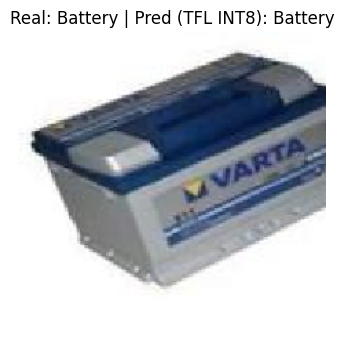

Logits dequantizados (INT8): [0.99609375 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [11]:
# ----------------------------
# INFERÊNCIA COM O TFLite INT8
# ----------------------------

# Carregar modelo TFLite INT8
interpreter_int8 = tf.lite.Interpreter(model_path=tflite_int8_path)
interpreter_int8.allocate_tensors()

input_details_i = interpreter_int8.get_input_details()
output_details_i = interpreter_int8.get_output_details()

print("INPUT (int8):", input_details_i)
print("OUTPUT (int8):", output_details_i)

# Resetar o gerador de teste
test_generator.reset()

# Pegar um batch de teste
test_images, test_labels = next(test_generator)

# Mesma imagem de teste
idx = 0
img = test_images[idx]
true_label_idx = np.argmax(test_labels[idx])
true_label = class_names[true_label_idx]

# Preparar entrada: quantizar a imagem [0,1] para int8
input_scale, input_zero_point = input_details_i[0]["quantization"]

img_float = np.expand_dims(img, axis=0).astype(np.float32)
input_data_int8 = img_float / input_scale + input_zero_point
input_data_int8 = np.clip(input_data_int8, -128, 127).astype(np.int8)

interpreter_int8.set_tensor(input_details_i[0]["index"], input_data_int8)
interpreter_int8.invoke()
output_data_int8 = interpreter_int8.get_tensor(output_details_i[0]["index"])

# Saída também é int8 – desquantizar para obter probabilidades aproximadas
output_scale, output_zero_point = output_details_i[0]["quantization"]
logits_dequant = (output_data_int8.astype(np.float32) - output_zero_point) * output_scale

pred_idx_int8 = int(np.argmax(logits_dequant[0]))
pred_class_int8 = class_names[pred_idx_int8]

plot_image(img, f"Real: {true_label} | Pred (TFL INT8): {pred_class_int8}")

print("Logits dequantizados (INT8):", logits_dequant[0])